In [83]:
import os
import pickle
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [84]:
plots_dir = '../plots'
data_dir = '../data'

In [85]:
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

In [103]:
def find_convergence(arr):
    for i in range(len(arr) - 100):
        temp = arr[i:i+100]
        if temp.sum() == 100.0:
            return i
    return len(arr) - 100

In [104]:
results = defaultdict(dict)
lstm_x = []
lstm_y = []
rnn_x = []
rnn_y = []

for file in os.listdir(data_dir):
    if file.endswith(".pkl"):
        with open(os.path.join(data_dir, file), 'rb') as f:
            filename = os.path.splitext(file)[0]
            model, length = filename.split('_')
            array = np.array(pickle.load(f))
            convergence_idx = find_convergence(array)
            single_result = array[convergence_idx:convergence_idx+100].mean()
            results[model][int(length)] = (np.arange(len(array)), array)
            if model == 'LSTM':
                lstm_x.append(int(length))
                lstm_y.append(single_result)
            elif model == 'RNN':
                rnn_x.append(int(length))
                rnn_y.append(single_result)
                
lstm_x = np.array(lstm_x)
lstm_y = np.array(lstm_y)
rnn_x = np.array(rnn_x)
rnn_y = np.array(rnn_y)

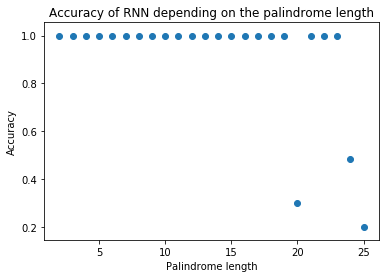

In [105]:
idxs = np.argsort(rnn_x)

plt.scatter(rnn_x[idxs], rnn_y[idxs])
plt.xlabel('Palindrome length')
plt.ylabel('Accuracy')
plt.title('Accuracy of RNN depending on the palindrome length')
plt.savefig(os.path.join(plots_dir, 'rnn_plot.png'), dpi=1000)

plt.show()

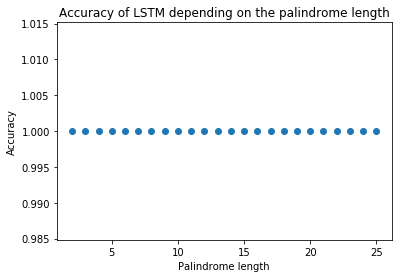

In [106]:
idxs = np.argsort(lstm_x)

plt.scatter(lstm_x[idxs], lstm_y[idxs])
plt.xlabel('Palindrome length')
plt.ylabel('Accuracy')
plt.title('Accuracy of LSTM depending on the palindrome length')
plt.savefig(os.path.join(plots_dir, 'lstm_plot.png'), dpi=1000)

plt.show()